# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [2]:
#%pip install -q numpy
#%pip install -q pandas
#%pip install -q matplotlib

In [3]:
import os
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### Load Files

Load the csv files using pandas

In [5]:
train_df = pd.read_csv('asl_data/sign_mnist_train.csv')
valid_df = pd.read_csv('asl_data/sign_mnist_valid.csv')

In [6]:
train_df.sample(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
10143,15,45,42,38,36,37,38,40,42,41,...,80,79,81,81,82,83,65,144,148,117
23578,12,76,90,99,106,112,114,118,121,123,...,101,178,166,169,171,172,173,173,173,173
8963,10,149,149,151,152,153,153,154,155,155,...,211,210,209,209,209,210,209,209,208,206
25921,13,205,207,208,208,208,209,209,209,208,...,245,244,242,239,241,233,205,165,129,106
18795,7,176,177,178,178,178,177,177,177,177,...,105,66,48,165,151,98,107,116,68,59
7978,0,164,165,166,166,166,167,168,168,168,...,187,189,188,188,188,187,187,187,187,186
5530,19,87,92,94,99,105,109,113,115,117,...,117,194,178,181,179,178,175,173,173,173
23364,3,150,154,158,161,163,166,168,169,171,...,94,103,110,114,116,137,180,204,203,191
5413,15,96,98,99,104,116,126,135,144,151,...,255,255,255,255,253,173,89,138,157,142
21385,16,138,141,147,149,152,155,157,158,160,...,202,196,197,196,195,195,196,195,195,194


In [7]:
array = train_df['label'].unique()

sorted(array)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

### Create Dataset

Creates the validation and test datasets

In [9]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [10]:
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, shuffle=True, random_state=43)

x_val.shape, x_test.shape, y_val.shape, y_test.shape

((5379, 784), (1793, 784), (5379,), (1793,))

In [11]:
# Create targets to labels

alphabet=list(string.ascii_lowercase)

target2label = { i: l for i,l in enumerate(alphabet) }

target2label

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

### Normalise

Perform normalization on the dataset using the train mean and std. dev.

In [13]:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [14]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

### Plot samples

In [16]:
def plot_image(image):
    plt.figure(figsize=(5,5))
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

The image is labeled with the label: c


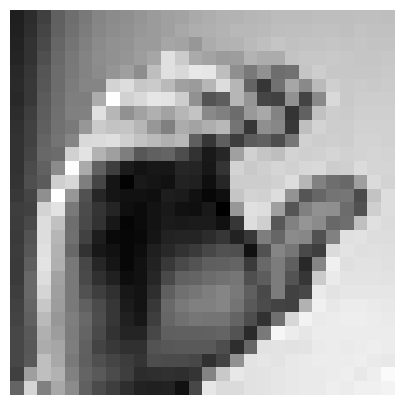

In [17]:
rnd_idx = np.random.randint(len(y_test))
print(f'The image is labeled with the label: {target2label[y_test[rnd_idx]]}')
plot_image(x_test[rnd_idx])

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [21]:
def create_minibatches(mb_size, x, y, shuffle = True):
    """This function creates mini-batches from the x and y datasets

    Args:
        mb_size (int): mini-batch size
        x (np.ndarray): train, valid or test dataset
        y (np.ndarray): train, valid or test labels
        shuffle (bool, optional): specifies if the batches are shuffled. Defaults to True.

    Returns:
        tuple: returns a tuple with the batches in pairs (x,y)
    """
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle: 
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]  
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Nuestra clase Linear, ReLU y Sequential

In [23]:
class np_tensor(np.ndarray): pass

###  Clase Linear

In [25]:
class Linear:
    
    def __init__(self, input_size: int, output_size: int) -> None:
        """Fully Connected Layer

        Args:
            input_size (int): input size of the fully connected layer
            output_size (int): ouput size of the fully connected layer
        """
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
        
    def __call__(self, X):
        return self.W @ X + self.b
    
    def backward(self, X, Z):        
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

In [27]:
class ReLU:
    
    def __call__(self, Z):
        return np.maximum(0, Z)

    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

In [28]:
from typing import Any

class Softmax:
    
    def __call__(self, z) -> Any:
        exp = np.exp(z)
        sum = np.sum(exp)
        return np.divide(exp, sum).copy()
    
    def backward(self, S):
        S_vector = S.reshape(S.shape[0],1)
        S_matrix = np.tile(S_vector,S.shape[0])
        S.grad = np.diag(S) - (S_matrix * np.transpose(S_matrix))

### Clase Sequential

In [30]:
class Sequential:

    def __init__(self, layers = None) -> None:
        """Creates a Neural Network of stacked layers

        Args:
            layers (list, optional): The list of layers. Defaults to None.
        """
        self.layers = layers
        self.outputs = {}

    def __call__(self, x):
        self.outputs['l0'] = x
        for i, layer in enumerate(self.layers, 1):
            x = layer(x)
            self.outputs['l' + str(i)] = x
        return x

    def backward(self):
        for i in reversed(range(len(self.layers))):
            li = self.outputs['l' + str(i)]
            li1 = self.outputs['l' + str(i + 1)]
            self.layers[i].backward(li, li1)

    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, (ReLU, Softmax)): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad

    def predict(self, x):
        return np.argmax(self.__call__(x))

### Cost Function

In [32]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis=0)
    preds = probs.copy()
    
    # Reshape de y para asegurar la forma correcta
    y = y.reshape(1, -1)
    
    # Cost
    y_hat = probs[y, np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    
    # Gradient calculation
    probs[y, np.arange(batch_size)] -= 1  # Corregido de y.squeeze() a y.reshape
    x.grad = probs.copy()
    
    return preds, cost

### Loop de entrenamiento

In [34]:
def train(model,epochs,mb_size=128, learning_rate=1e-3):
    for epoch in range(epochs):
        for i, (x,y) in enumerate(create_minibatches(mb_size, x_train,y_train)):
            scores= model(x.T.view(np_tensor))
            _, cost =softmaxXEntropy(scores,y)
            model.backward()
            model.update(learning_rate)
        print(f'cost: {cost}, accuracy: {accuracy(x_val,y_val,mb_size)}')
    

### Create your model and train it

In [36]:
def accuracy(x, y, mb_size):
    correct=0
    total= 0
    for i,(x,y) in enumerate(create_minibatches(mb_size,x,y)):
        pred= model(x.T.view(np_tensor))
        correct+= np.sum(np.argmax(pred,axis=0)== y.squeeze())
        total+= pred.shape[1]
    return correct/total


In [37]:
num_classes = len(np.unique(y_train))
model = Sequential([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, num_classes)])
mb_size=512
learning_rate=1e-4
epochs=20

In [68]:
train(model,epochs,mb_size,learning_rate)

cost: 0.01266310302084125, accuracy: 0.7659416248373303
cost: 0.013928209530629647, accuracy: 0.7700316043874326
cost: 0.011181529558386659, accuracy: 0.7663134411600669
cost: 0.012493259688780923, accuracy: 0.7687302472578547
cost: 0.011427962550568374, accuracy: 0.7655698085145938
cost: 0.011067607386784918, accuracy: 0.7685443390964863
cost: 0.00938627117051705, accuracy: 0.769659788064696
cost: 0.0086105773428329, accuracy: 0.7724484104852203
cost: 0.009095824342744955, accuracy: 0.7698456962260644
cost: 0.008870426081459321, accuracy: 0.7694738799033277
cost: 0.008614438051964232, accuracy: 0.7705893288715374
cost: 0.009224193810976805, accuracy: 0.7698456962260644
cost: 0.007509742882495069, accuracy: 0.7687302472578547
cost: 0.008289827693976369, accuracy: 0.7702175125488009
cost: 0.008259664189772174, accuracy: 0.7679866146123815
cost: 0.007530512429360846, accuracy: 0.772262502323852
cost: 0.007510590337284543, accuracy: 0.7694738799033277
cost: 0.0060921386856784155, accuracy

In [39]:
print(accuracy(x_test,y_test, mb_size))

0.7830451756832125


### Test your model on Random data from your test set

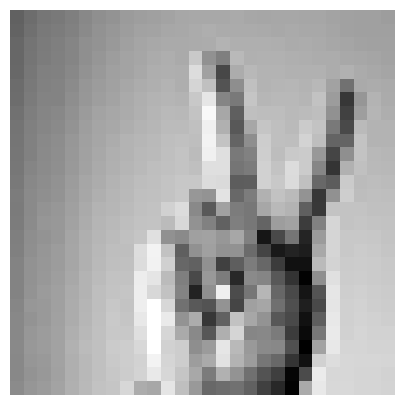

el valor predicho es: v el valor real es:u


In [69]:
idx = np.random.randint(len(y_test))
plot_image(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx]]}')